In [1]:
!pip install pandas yfinance matplotlib scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import yfinance as yf

In [3]:
df = yf.download('AAPL', start="2015-01-01", end="2025-08-22")

/tmp/ipykernel_6372/1444530842.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start="2015-01-01", end="2025-08-22")
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.261045,24.729268,23.821670,24.718172,212818400
2015-01-05,23.577581,24.110158,23.391181,24.030271,257142000
2015-01-06,23.579794,23.839424,23.218085,23.641928,263188400
2015-01-07,23.910437,24.010294,23.677434,23.788387,160423600
2015-01-08,24.829126,24.886823,24.121244,24.238856,237458000
2015-01-09,24.855757,25.130920,24.456324,25.002214,214798000
2015-01-12,24.243296,24.993339,24.143438,24.986682,198603200
2015-01-13,24.458546,25.031065,24.167849,24.727052,268367600


In [5]:
df.tail(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-08-08,229.090012,230.738135,219.001455,220.579666,113854000
2025-08-11,227.179993,229.559998,224.759995,227.919998,61806100
2025-08-12,229.649994,230.800003,227.070007,228.009995,55626200
2025-08-13,233.330002,235.000000,230.429993,231.070007,69878500
2025-08-14,232.779999,235.119995,230.850006,234.059998,51916300
2025-08-15,231.589996,234.279999,229.339996,234.000000,56038700
2025-08-18,230.889999,233.119995,230.110001,231.699997,37476200
2025-08-19,230.559998,232.869995,229.350006,231.279999,39402600


In [6]:
df.to_csv('AAPL_raw_data.csv')

In [8]:
df = pd.read_csv('AAPL_raw_data.csv', header=0, skiprows=[1, 2])

In [9]:
df.rename(columns={'Price': 'Date'}, inplace=True)

In [10]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

In [11]:
df['Change_Over_Time'] = df['Close'].diff()

In [12]:
df['Change_Over_Time'].fillna(0, inplace=True)

/tmp/ipykernel_6372/2688746579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Change_Over_Time'].fillna(0, inplace=True)


In [13]:
df['typical_price'] = (df['High'] + df['Low'] + df['Close']) / 3
df['tp_volume'] = df['typical_price'] * df['Volume']
df['VWAP'] = df['tp_volume'].groupby(df.index.date).cumsum() / df['Volume'].groupby(df.index.date).cumsum()

In [14]:
df = df.drop(columns=['typical_price', 'tp_volume'])

In [15]:
df.head()

,Close,High,Low,Open,Volume,Change_Over_Time,VWAP
Date,,,,,,,
2015-01-02,24.261045,24.729268,23.821670,24.718172,212818400,0.000000,24.270661
2015-01-05,23.577581,24.110158,23.391181,24.030271,257142000,-0.683464,23.692973
2015-01-06,23.579794,23.839424,23.218085,23.641928,263188400,0.002213,23.545768
2015-01-07,23.910437,24.010294,23.677434,23.788387,160423600,0.330643,23.866055
2015-01-08,24.829126,24.886823,24.121244,24.238856,237458000,0.918690,24.612398


In [16]:
df.tail()

,Close,High,Low,Open,Volume,Change_Over_Time,VWAP
Date,,,,,,,
2025-08-15,231.589996,234.279999,229.339996,234.000000,56038700,-1.190002,231.736664
2025-08-18,230.889999,233.119995,230.110001,231.699997,37476200,-0.699997,231.373332
2025-08-19,230.559998,232.869995,229.350006,231.279999,39402600,-0.330002,230.926666
2025-08-20,226.009995,230.470001,225.770004,229.979996,42190600,-4.550003,227.416667
2025-08-21,224.990005,226.520004,224.510101,226.279999,13020224,-1.019989,225.340037


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2675 entries, 2015-01-02 to 2025-08-21
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             2675 non-null   float64
 1   High              2675 non-null   float64
 2   Low               2675 non-null   float64
 3   Open              2675 non-null   float64
 4   Volume            2675 non-null   int64  
 5   Change_Over_Time  2675 non-null   float64
 6   VWAP              2675 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 167.2 KB


In [18]:
df.describe()

,Close,High,Low,Open,Volume,Change_Over_Time,VWAP
count,2675.000000,2675.000000,2675.000000,2675.000000,2.675000e+03,2675.000000,2675.000000
mean,101.202606,102.219138,100.085983,101.111834,1.135370e+08,0.075039,101.169243
std,69.880617,70.570842,69.109649,69.805651,6.806809e+07,2.205939,69.849481
min,20.624050,20.927678,20.425436,20.546428,1.302022e+07,-20.649445,20.713082
25%,36.277184,36.534225,35.936830,36.283725,6.768410e+07,-0.520267,36.264796
50%,76.876076,77.364229,76.000021,76.650568,9.648600e+07,0.048197,76.678068
75%,163.170578,164.780416,161.743952,163.092017,1.384640e+08,0.734264,163.269782
max,258.103729,259.179926,256.718662,257.276679,6.488252e+08,26.365463,258.000772


In [19]:
df.isna().sum()

Close               0
High                0
Low                 0
Open                0
Volume              0
Change_Over_Time    0
VWAP                0
dtype: int64

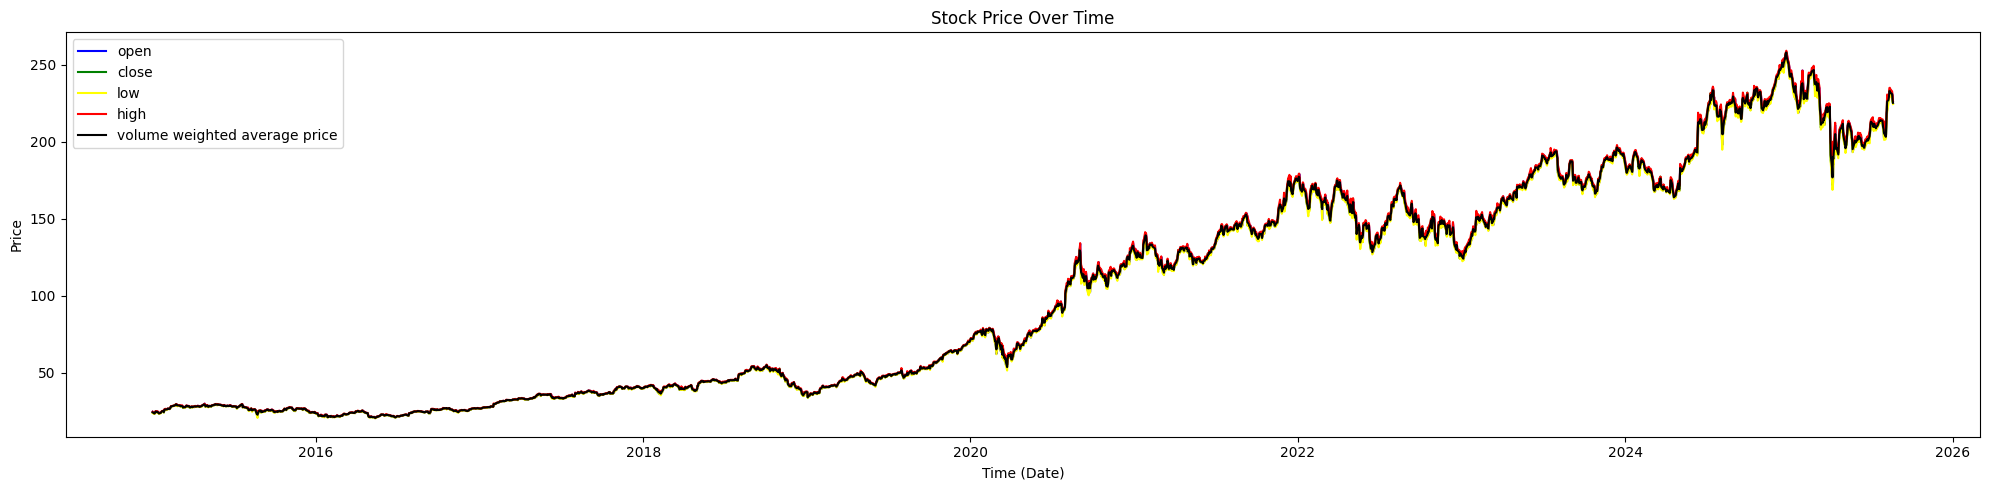

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1, 1, 1)

plt.plot(df.index, df['Open'], color='blue', label='open')
plt.plot(df.index, df['Close'], color='green', label='close')
plt.plot(df.index, df['Low'], color='yellow', label='low')
plt.plot(df.index, df['High'], color='red', label='high')
plt.plot(df.index, df['VWAP'], color='black', label='volume weighted average price')

plt.title('Stock Price Over Time')
plt.xlabel('Time (Date)')
plt.ylabel('Price')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

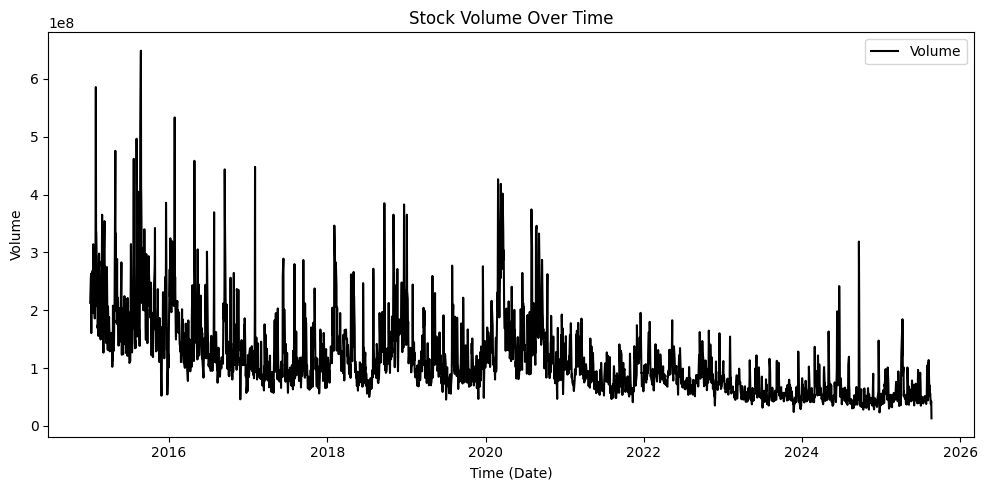

In [21]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)

plt.plot(df.index, df['Volume'], color='black', label='Volume')

plt.title('Stock Volume Over Time')
plt.xlabel('Time (Date)')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler

df_clean = df

df_clean.drop(df.columns[[0,1,2,3,4,5]], axis=1, inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))

df_cleaned = scaler.fit_transform(df_clean)

In [23]:
df.to_csv('AAPL_cleaned_data.csv')

In [132]:
train_size = int(len(df) * 0.70)
test_size = len(df) - train_size
train, test = df1[0:train_size,:], df1[train_size:len(df),:]
print(len(train),len(test))

NameError: name 'df1' is not defined